In [1]:
train_finished_episode_p10_1 = list(range(50))

In [2]:
train_episode_rewards_p10_1 = [17, 30, 36, 24, 24, 18, 14, 13, 12, 21,
                                44, 25, 14, 14, 16, 18, 38, 16, 9, 13,
                                12, 23, 15, 40, 19, 15, 28, 23, 16, 13,
                                22, 32, 23, 17, 25, 15, 29, 19, 13, 67,
                                13, 52, 49, 19, 21, 55, 11, 23, 42, 60]

In [3]:
train_finished_episode_p10_2 = list(range(50, 50+70))

In [4]:
train_episode_rewards_p10_2 = [49, 20, 42, 13, 18, 19, 58, 39, 12, 27,
                                35, 52, 25, 15, 27, 33, 26, 15, 23, 33,
                                17, 38, 13, 42, 33, 40, 14, 26, 12, 26,
                                77, 13, 32, 51, 11, 21, 45, 15, 15, 10,
                                13, 12, 29, 17, 19, 17, 10, 39, 23, 14,
                                60, 11, 38, 30, 17, 26, 19, 19, 22, 37,
                                46, 14, 15, 16, 22, 14, 16, 43, 28, 100]

In [5]:
train_finished_episode_p10_345 = list(range(120, 120+35))

In [6]:
train_episode_rewards_p10_345 = [18, 31, 88, 43, 30, 45, 132, 38, 13, 18,
                                29, 58, 15, 36, 17, 22, 16, 26, 36, 13,
                                14, 35, 9, 23, 14, 35, 22, 23, 61, 28,
                                15, 17, 26, 17, 16]

In [1]:
infer_episode = list(range(0,100))

In [2]:
infer_rewards = [19, 111, 47, 49, 25, 18, 17, 14, 18, 15, 
                46, 35, 19, 10, 27, 94, 15, 14, 37, 23, 
                21, 15, 15, 51, 11, 14, 43, 35, 52, 15,
                44, 13, 15, 24, 27, 29, 11, 29, 44, 44,
                36, 38, 11, 17, 31, 32, 14, 14, 30, 26, 
                25, 13, 19, 47, 33, 12, 31, 15, 13, 21,
                18, 10, 68, 17, 13, 50, 89, 11, 51, 19, 
                14, 23, 67, 11, 33, 23, 30, 22, 20, 26,
                96, 24, 10, 17, 14, 12, 13, 23, 15, 13,
                12, 17, 11, 46, 21, 17, 10, 33, 25, 24]

In [7]:
train_finished_episode_p10_12345 = train_finished_episode_p10_1+train_finished_episode_p10_2+train_finished_episode_p10_345

In [8]:
train_episode_rewards_p10_12345 = train_episode_rewards_p10_1+train_episode_rewards_p10_2+train_episode_rewards_p10_345

In [9]:
import numpy as np
train_episode_rewards_p10_1234 = np.array(train_episode_rewards_p10_12345)

In [62]:
num_choose_10 = len(train_finished_episode_p10_12345) - 100

In [63]:
max_mean_10 = 0
max_mean_10_val = []
max_mean_10_id = []
for i in range(num_choose_10):
    mean_10 = np.mean(train_episode_rewards_p10_1234[i:i+100])
    if mean_10 >= max_mean_10:
        max_mean_10_val.append(mean_10)
        max_mean_10_id.append(i)
        max_mean_10 = mean_10

In [64]:
max_mean_10_val

[25.52,
 25.95,
 25.96,
 26.06,
 26.22,
 26.24,
 26.42,
 27.29,
 27.35,
 27.43,
 28.16,
 28.19,
 28.3,
 28.6,
 29.64,
 29.79,
 29.81,
 29.88,
 30.14,
 30.25,
 30.41]

In [65]:
max_mean_10_id

[0,
 1,
 8,
 9,
 10,
 11,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 34,
 39]

In [68]:
mean_10 = [np.mean(train_episode_rewards_p10_1234[39:39+100])]*len(train_episode_rewards_p10_1234[39:39+100])

In [4]:
import numpy as np
infer_episode = np.array(infer_episode)
mean_infer = [np.mean(infer_episode)]*len(infer_episode)

In [6]:
infer_moving_avg_rewards = []
for i in range(len(infer_rewards)):
    movingavgs = np.mean(infer_rewards[max(0,i-5):i+1])
    infer_moving_avg_rewards.append(movingavgs)

In [69]:
train_moving_avg_rewards_p10_12345 = []
for i in range(len(train_episode_rewards_p10_12345[39:39+100])):
    movingavgs = np.mean(train_episode_rewards_p10_12345[39:39+100][max(0,i-5):i+1])
    train_moving_avg_rewards_p10_12345.append(movingavgs)

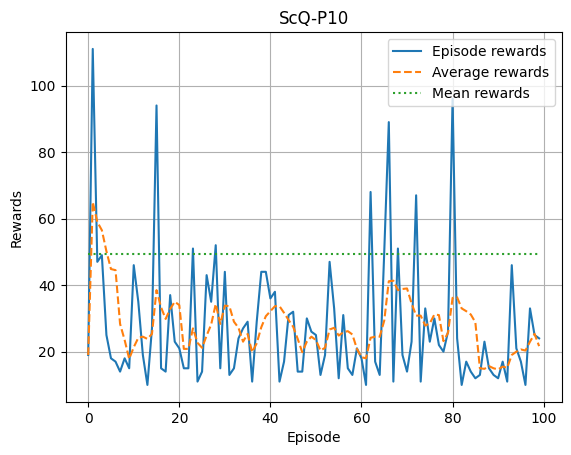

In [8]:
import matplotlib.pyplot as plt
plt.plot(infer_episode, infer_rewards, label='Episode rewards')
plt.plot(infer_episode, infer_moving_avg_rewards, label='Average rewards', linestyle='dashed')
plt.plot(infer_episode, mean_infer, label='Mean rewards', linestyle='dotted')
plt.title('ScQ-P10')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.grid()
plt.legend(loc='upper right')

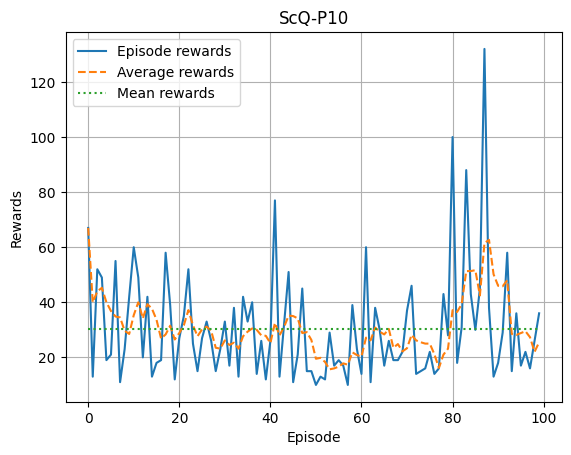

In [71]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,100)), train_episode_rewards_p10_12345[39:39+100], label='Episode rewards')
plt.plot(list(range(0,100)), train_moving_avg_rewards_p10_12345, label='Average rewards', linestyle='dashed')
plt.plot(list(range(0,100)), mean_10, label='Mean rewards', linestyle='dotted')
plt.title('ScQ-P10')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.grid()
plt.legend()

In [13]:
train_finished_episode_p18_01 = list(range(41))

In [14]:
train_episode_rewards_p18_01 = [12, 13, 13, 11, 14, 21, 9, 24, 12, 18,
                                20, 13, 15, 18, 12, 22, 35, 23, 10, 12,
                                40, 17, 27, 29, 10, 14, 11, 14, 15, 45,
                                15, 15, 13, 14, 16, 17, 13, 36, 23, 41, 52]

In [15]:
train_finished_episode_p18_23 = list(range(41, 41+52))

In [16]:
train_episode_rewards_p18_23 = [12, 29, 24, 42, 15, 22, 41, 23, 14, 80,
                                21, 10, 11, 18, 12, 14, 25, 13, 29, 17,
                                15, 13, 16, 16, 28, 30, 43, 17, 25, 11,
                                15, 18, 41, 22, 14, 17, 17, 16, 22, 10,
                                17, 11, 26, 43, 18, 35, 39, 10, 12, 14, 10, 12]

In [17]:
train_finished_episode_p18_4 = list(range(93, 93+17))

In [22]:
train_episode_rewards_p18_4 = [13, 44, 15, 20, 44, 19, 16, 17, 47, 14,
                                21, 28, 31, 10, 20, 23, 24]

In [23]:
train_finished_episode_p18_56 = list(range(110, 110+66))

In [24]:
train_episode_rewards_p18_56 = [10, 9, 11, 9, 21, 9, 21, 12, 17, 17,
                                11, 17, 29, 15, 31, 10, 18, 13, 13, 30,
                                9, 15, 13, 17, 47, 24, 42, 19, 41, 25,
                                26, 86, 14, 18, 12, 32, 15, 20, 23, 22,
                                12, 25, 16, 14, 17, 12, 11, 19, 13, 26,
                                18, 18, 30, 26, 33, 15, 13, 15, 22, 13,
                                30, 40, 20, 28, 26, 12]

In [25]:
train_finished_episode_p18_0123456 = train_finished_episode_p18_01+train_finished_episode_p18_23+train_finished_episode_p18_4+train_finished_episode_p18_56
train_episode_rewards_p18_0123456 = train_episode_rewards_p18_01+train_episode_rewards_p18_23+train_episode_rewards_p18_4+train_episode_rewards_p18_56

In [72]:
train_episode_rewards_p18_0123456 = np.array(train_episode_rewards_p18_0123456)
num_choose_18 = len(train_finished_episode_p18_0123456) - 100

In [73]:
num_choose_18

76

In [74]:
max_mean_18 = 0
max_mean_18_val = []
max_mean_18_id = []
for i in range(num_choose_18):
    mean_18 = np.mean(train_episode_rewards_p18_0123456[i:i+100])
    if mean_18 >= max_mean_18:
        max_mean_18_val.append(mean_18)
        max_mean_18_id.append(i)
        max_mean_18 = mean_18

In [75]:
max_mean_18_val

[21.0, 21.05, 21.39, 21.4, 21.5, 21.64, 21.74, 21.75, 21.82, 21.88, 22.06]

In [76]:
max_mean_18_id

[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 42]

In [77]:
mean_18 = [np.mean(train_episode_rewards_p18_0123456[42:42+100])]*len(train_episode_rewards_p18_0123456[42:42+100])

In [78]:
train_moving_avg_rewards_p18_0123456 = []
for i in range(len(train_episode_rewards_p18_0123456[42:42+100])):
    movingavgs = np.mean(train_episode_rewards_p18_0123456[42:42+100][max(0,i-5):i+1])
    train_moving_avg_rewards_p18_0123456.append(movingavgs)

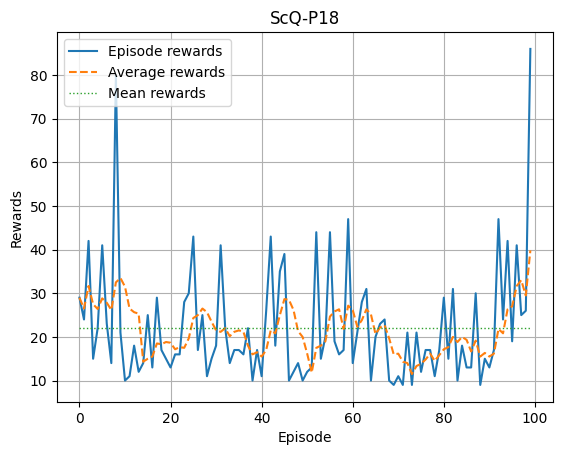

In [80]:
plt.plot(list(range(0,100)), train_episode_rewards_p18_0123456[42:42+100], label='Episode rewards')
plt.plot(list(range(0,100)), train_moving_avg_rewards_p18_0123456, label='Average rewards', linestyle='dashed')
plt.plot(list(range(0,100)), mean_18, label='Mean rewards', linestyle='dotted', linewidth=1)
plt.title('ScQ-P18')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.grid()
plt.legend(loc='upper left')

In [29]:
train_finished_episode_p136_1 = list(range(13))
train_episode_rewards_p136_1 = [14, 26, 33, 50, 19, 56, 9, 14, 32, 46,
                                18, 21, 32]

In [30]:
train_finished_episode_p136_2 = list(range(13, 13+68))
train_episode_rewards_p136_2 = [10, 14, 21, 24, 35, 16, 33, 18, 19, 10,
                                12, 30, 14, 23, 32, 33, 13, 32, 19, 27,
                                24, 11, 13, 17, 20, 24, 13, 14, 20, 27,
                                47, 11, 58, 15, 42, 48, 35, 12, 18, 18,
                                16, 12, 25, 25, 76, 14, 27, 31, 28, 32,
                                17, 13, 16, 28, 36, 26, 31, 15, 21, 11,
                                26, 14, 15, 20, 11, 15, 21, 18]

In [33]:
train_finished_episode_p136_3 = list(range(81, 81+17))
train_episode_rewards_p136_3 = [11, 12, 36, 91, 17, 12, 9, 21, 11, 19,
                                36, 57, 27, 21, 22, 20, 94]

In [34]:
train_finished_episode_p136_45 = list(range(98, 98+17))
train_episode_rewards_p136_45 = [25, 14, 51, 21, 16, 28, 35, 13, 14, 44,
                                21, 70, 24, 15, 31, 17, 28]

In [36]:
train_finished_episode_p136_12345 = train_finished_episode_p136_1+train_finished_episode_p136_2+train_finished_episode_p136_3+train_finished_episode_p136_45
train_episode_rewards_p136_12345 = train_episode_rewards_p136_1+train_episode_rewards_p136_2+train_episode_rewards_p136_3+train_episode_rewards_p136_45

In [81]:
train_episode_rewards_p136_12345 = np.array(train_episode_rewards_p136_12345)
num_choose_136 = len(train_finished_episode_p136_12345) - 100

In [82]:
num_choose_136

15

In [83]:
max_mean_136 = 0
max_mean_136_val = []
max_mean_136_id = []
for i in range(num_choose_136):
    mean_136 = np.mean(train_episode_rewards_p136_12345[i:i+100])
    if mean_136 >= max_mean_136:
        max_mean_136_val.append(mean_136)
        max_mean_136_id.append(i)
        max_mean_136 = mean_136

In [84]:
max_mean_136_val

[24.87, 25.24]

In [85]:
max_mean_136_id

[0, 1]

In [86]:
mean_136 = [np.mean(train_episode_rewards_p136_12345[1:1+100])]*len(train_episode_rewards_p136_12345[1:1+100])

In [87]:
train_moving_avg_rewards_p136_12345 = []
for i in range(len(train_episode_rewards_p136_12345[1:1+100])):
    movingavgs = np.mean(train_episode_rewards_p136_12345[1:1+100][max(0,i-5):i+1])
    train_moving_avg_rewards_p136_12345.append(movingavgs)

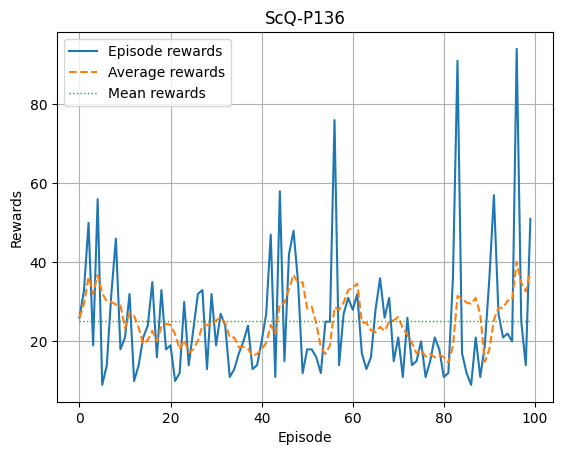

In [88]:
plt.plot(list(range(0,100)), train_episode_rewards_p136_12345[1:1+100], label='Episode rewards')
plt.plot(list(range(0,100)), train_moving_avg_rewards_p136_12345, label='Average rewards', linestyle='dashed')
plt.plot(list(range(0,100)), mean_136, label='Mean rewards', linestyle='dotted', linewidth=1)
plt.title('ScQ-P136')
plt.xlabel('Episode')
plt.ylabel('Rewards')
plt.grid()
plt.legend()

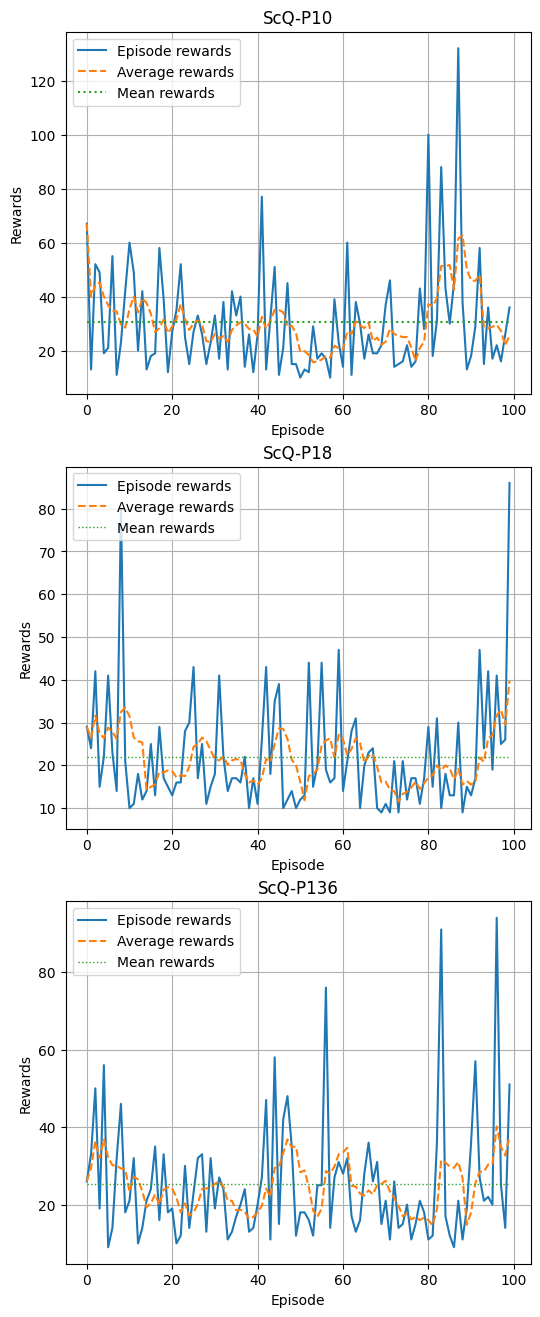

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 16))
ax1.plot(list(range(0,100)), train_episode_rewards_p10_12345[39:39+100], label='Episode rewards')
ax1.plot(list(range(0,100)), train_moving_avg_rewards_p10_12345, label='Average rewards', linestyle='dashed')
ax1.plot(list(range(0,100)), mean_10, label='Mean rewards', linestyle='dotted')
ax1.set_title('ScQ-P10')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Rewards')
ax1.grid()
ax1.legend()

ax2.plot(list(range(0,100)), train_episode_rewards_p18_0123456[42:42+100], label='Episode rewards')
ax2.plot(list(range(0,100)), train_moving_avg_rewards_p18_0123456, label='Average rewards', linestyle='dashed')
ax2.plot(list(range(0,100)), mean_18, label='Mean rewards', linestyle='dotted', linewidth=1)
ax2.set_title('ScQ-P18')
ax2.set_xlabel('Episode')
ax2.set_ylabel('Rewards')
ax2.grid()
ax2.legend(loc='upper left')

ax3.plot(list(range(0,100)), train_episode_rewards_p136_12345[1:1+100], label='Episode rewards')
ax3.plot(list(range(0,100)), train_moving_avg_rewards_p136_12345, label='Average rewards', linestyle='dashed')
ax3.plot(list(range(0,100)), mean_136, label='Mean rewards', linestyle='dotted', linewidth=1)
ax3.set_title('ScQ-P136')
ax3.set_xlabel('Episode')
ax3.set_ylabel('Rewards')
ax3.grid()
ax3.legend()


In [3]:
train_finished_episode_arch = list(range(0, 500, 10))

In [5]:
train_average_rewards_id10 = [28.2, 23.4, 27.7, 23, 34.9, 35.7, 36.2, 46.8, 85.2, 116.5,
                            162.1, 200.1, 165.9, 166.6, 164.1, 272.1, 333.5, 446.7, 359.7, 477.3,
                            494.8, 488.9, 492.9, 481.8, 500.0, 496.3, 500.0, 500.0, 500.0, 500.0,
                            500.0, 500.0, 500.0, 338.7, 355.6, 500.0, 500.0, 500.0, 500.0, 470.3,
                            386.0, 460.5, 436.9, 500.0, 482.6, 500.0, 500.0, 455.1, 485.9, 500.0]

In [7]:
train_average_rewards_layer5 = [20.3, 20.9, 31.9, 33.6, 31.9, 60.6, 52.5, 100.0, 110.5, 119.7,
                                149.4, 142.3, 146.9, 191.6, 202.8, 213.1, 251.8, 284.7, 356.3, 383.5,
                                386.2, 372.9, 328.4, 265.8, 250.5, 230.7, 226.2, 201.7, 193.2, 174.7,
                                169.0, 179.3, 184.7, 185.9, 186.0, 190.2, 187.3, 184.3, 185.9, 176.2,
                                196.6, 173.8, 170.1, 162.9, 172.0, 150.7, 163.2, 157.3, 164.6, 156.3]

In [8]:
train_average_rewards_eqas = [14.8, 12.8, 18.5, 22.3, 15.0, 14.3, 22.8, 22.3, 18.6, 19.3,
                            23.2, 24.6, 23.8, 30.4, 25.7, 25.5, 23.8, 23.0, 22.7, 26.6,
                            29.6, 30.0, 40.2, 46.0, 42.7, 74.4, 70.5, 162.2, 179.3, 198.6, 
                            205.0, 284.9, 337.1, 296.4, 351.5, 433.2, 434.3, 399.1, 346.1, 376.1,
                            365.1, 433.0, 375.1, 472.7, 418.4, 399.1, 446.2, 423.9, 403.1, 437.6]

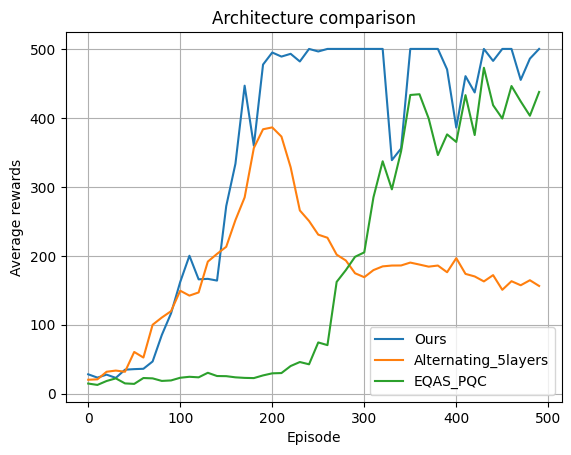

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_finished_episode_arch, train_average_rewards_id10, label='Ours')
plt.plot(train_finished_episode_arch, train_average_rewards_layer5, label='Alternating_5layers')
plt.plot(train_finished_episode_arch, train_average_rewards_eqas, label='EQAS_PQC')
plt.title('Architecture comparison of training')
plt.xlabel('Episode')
plt.ylabel('Average rewards')
plt.legend()
plt.grid()

In [1]:
import argparse
import re
import sys
from functools import reduce

sys.path.insert(0, '/home/jinyuxin/Documents/quafu_rl/nsga_net')

import cirq
import gym
# model imports
import models.quantum_genotypes as genotypes
import numpy as np
import tensorflow as tf
from models.quantum_models import generate_circuit
from models.quantum_models import generate_model_policy as Network
from models.quantum_models import get_model_circuit_params
from PIL import Image
from quafu import QuantumCircuit as quafuQC
from quafu import Task, User

2023-04-24 15:35:43.242017: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-24 15:35:44.950820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22306 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:5b:00.0, compute capability: 8.6
2023-04-24 15:35:44.952541: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22306 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:9b:00.0, compute capability: 8.6
2023-04-24 15:35:44.953651: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device

In [2]:
parser = argparse.ArgumentParser('Reinforcement learining with quantum computing cloud Quafu')
parser.add_argument('--env_name', type=str, default='CartPole-v1', help='environment name')
parser.add_argument('--state_bounds', type=np.array, default=np.array([2.4, 2.5, 0.21, 2.5]), help='state bounds')
parser.add_argument('--n_qubits', type=int, default=4, help='the number of qubits')
parser.add_argument('--n_actions', type=int, default=2, help='the number of actions')
parser.add_argument('--arch', type=str, default='Eqas_PQC', help='which architecture to use')
parser.add_argument('--shots', type=int, default=1000, help='the number of sampling')
parser.add_argument('--backend', type=str, default='ScQ-P18', help='which backend to use')
parser.add_argument('--model_path', type=str, default='/home/jinyuxin/Documents/quafu_rl/nsga_net/weights_eqas_472.h5', help='path of pretrained model')
args = parser.parse_args(args=[])

In [3]:
def get_res_exp(res):
    # access to probabilities of all possibilities 
    prob = res.probabilities
    sumexp = 0
    for k, v in prob.items():
        count = 0
        for i in range(len(k)):
            if k[i] == '1':
                count += 1
        if count % 2 == 0:
            sumexp += v
        else:
            sumexp -= v
    return sumexp


def get_quafu_exp(circuit):
    # convert Cirq circuts to qasm
    openqasm = circuit.to_qasm(header='')
    openqasm = re.sub('//.*\n', '', openqasm)
    openqasm = "".join([s for s in openqasm.splitlines(True) if s.strip()])
    
    # fill in with your token, register on website http://quafu.baqis.ac.cn/
    user = User()
    user.save_apitoken("InMYrtO6whI3IaiLXdpbNAhzaRRtscbZwsuqRTPct1m.9NDO4cTO5QDO2EjOiAHelJCL3YjM6ICZpJye.9JiN1IzUIJiOicGbhJCLiQ1VKJiOiAXe0Jye")
    
    # initialize to Quafu circuits
    q = quafuQC(args.n_qubits)
    q.from_openqasm(openqasm)
    
    # create the task
    task = Task()
    task.load_account()
    
    # choose sampling number and specific quantum devices
    shots = args.shots   
    task.config(backend=args.backend, shots=shots, compile=True)
    task_id = task.send(q, wait=True).taskid
    print('task_id:', task_id)
    
    # retrieve the result of completed tasks and compute expectations
    task_status = task.retrieve(task_id).task_status
    if task_status == 'Completed':
        task = Task()
        task.load_account()
        res = task.retrieve(task_id)
        OB = get_res_exp(res)
        gates = res.transpiled_circuit.gates
        layered_circuit = res.transpiled_circuit.layered_circuit()
    return task_id, tf.convert_to_tensor([[OB]]), gates, layered_circuit


class Alternating_(tf.keras.layers.Layer):
    def __init__(self, obsw):
        super(Alternating_, self).__init__()
        self.w = tf.Variable(
            initial_value=tf.constant(obsw), dtype="float32", trainable=True, name="obsw")

    def call(self, inputs):
        return tf.matmul(inputs, self.w)


def get_obs_policy(obsw):
    process = tf.keras.Sequential([ Alternating_(obsw),
                                    tf.keras.layers.Lambda(lambda x: x * 1.0),
                                    tf.keras.layers.Softmax()
                                ], name="obs_policy")
    return process

In [4]:
qubits = cirq.GridQubit.rect(1, args.n_qubits)
genotype = eval("genotypes.%s" % args.arch)
ops = [cirq.Z(q) for q in qubits]
observables = [reduce((lambda x, y: x * y), ops)] # Z_0*Z_1*Z_2*Z_3
model = Network(qubits, genotype, args.n_actions, observables)
model.load_weights(args.model_path)

env = gym.make(args.env_name)
state = env.reset() 
    
# get PQC model parameters and expectations
stateb = state/args.state_bounds
newtheta, newlamda = get_model_circuit_params(qubits, genotype, model)
circuit, _, _ = generate_circuit(qubits, genotype, newtheta, newlamda, stateb)
_, _, gates, depth = get_quafu_exp(circuit)
    
env.close()

task_id: 2770867004B93A83


In [12]:
gateid10 = gates
depthid10 = depth
numgate_id10 = len(gateid10) - 1

In [13]:
numgate_id10

53

In [14]:
cnot_id10 = 9

In [19]:
d_id10 = len(depthid10[0]) - 2
d_id10

22

In [5]:
gatelayer5 = gates
depthlayer5 = depth
numgate_layer5 = len(gatelayer5) - 1
numgate_layer5

92

In [8]:
cnot_layer5 = 15

In [9]:
d_layer5 = len(depthlayer5[0]) - 2
d_layer5

35

In [6]:
gateeqas = gates
deptheqas = depth
numgate_eqas = len(gateeqas) - 1
numgate_eqas

73

In [8]:
cnot_eqas = 18

In [10]:
d_eqas = len(deptheqas[0]) - 2
d_eqas

33

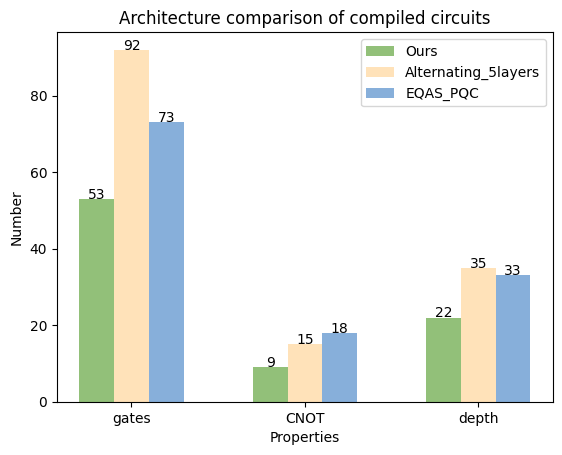

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 创建三个对象的三个性质的数据
Ours = [53, 9, 22]
Alternating_5layers = [92, 15, 35]
EQAS_PQC = [73, 18, 33]
properties = ['gates', 'CNOT', 'depth']

# 创建x轴上的位置
x = np.arange(len(properties))

# 设置每个柱子的宽度
width = 0.2

# 绘制三个对象的三个性质的柱状图
plt.bar(x - width, Ours, width, label='Ours', color=(0.831**3, 0.910**3, 0.780**3))
plt.bar(x, Alternating_5layers, width, label='Alternating_5layers', color=(1.0**3, 0.961**3, 0.851**3))
plt.bar(x + width, EQAS_PQC, width, label='EQAS_PQC', color=(0.808**3, 0.882**3, 0.949**3))

# 标注每个柱子上的数值
for i, j in enumerate(Ours):
    plt.text(i - width, j+0.1, str(j), ha='center')
for i, j in enumerate(Alternating_5layers):
    plt.text(i, j+0.1, str(j), ha='center')
for i, j in enumerate(EQAS_PQC):
    plt.text(i + width, j+0.1, str(j), ha='center')

# 设置图表标题和轴标签
plt.title('Architecture comparison of compiled circuits')
plt.xlabel('Properties')
plt.ylabel('Number')

# 设置x轴刻度标签
plt.xticks(x, properties)

# 增加图例
plt.legend()

In [17]:
train_finished_episode_arch = list(range(0, 500, 10))

train_average_rewards_id10 = [28.2, 23.4, 27.7, 23, 34.9, 35.7, 36.2, 46.8, 85.2, 116.5,
                            162.1, 200.1, 165.9, 166.6, 164.1, 272.1, 333.5, 446.7, 359.7, 477.3,
                            494.8, 488.9, 492.9, 481.8, 500.0, 496.3, 500.0, 500.0, 500.0, 500.0,
                            500.0, 500.0, 500.0, 338.7, 355.6, 500.0, 500.0, 500.0, 500.0, 470.3,
                            386.0, 460.5, 436.9, 500.0, 482.6, 500.0, 500.0, 455.1, 485.9, 500.0]

train_average_rewards_layer5 = [20.3, 20.9, 31.9, 33.6, 31.9, 60.6, 52.5, 100.0, 110.5, 119.7,
                                149.4, 142.3, 146.9, 191.6, 202.8, 213.1, 251.8, 284.7, 356.3, 383.5,
                                386.2, 372.9, 328.4, 265.8, 250.5, 230.7, 226.2, 201.7, 193.2, 174.7,
                                169.0, 179.3, 184.7, 185.9, 186.0, 190.2, 187.3, 184.3, 185.9, 176.2,
                                196.6, 173.8, 170.1, 162.9, 172.0, 150.7, 163.2, 157.3, 164.6, 156.3]

train_average_rewards_eqas = [14.8, 12.8, 18.5, 22.3, 15.0, 14.3, 22.8, 22.3, 18.6, 19.3,
                            23.2, 24.6, 23.8, 30.4, 25.7, 25.5, 23.8, 23.0, 22.7, 26.6,
                            29.6, 30.0, 40.2, 46.0, 42.7, 74.4, 70.5, 162.2, 179.3, 198.6, 
                            205.0, 284.9, 337.1, 296.4, 351.5, 433.2, 434.3, 399.1, 346.1, 376.1,
                            365.1, 433.0, 375.1, 472.7, 418.4, 399.1, 446.2, 423.9, 403.1, 437.6]

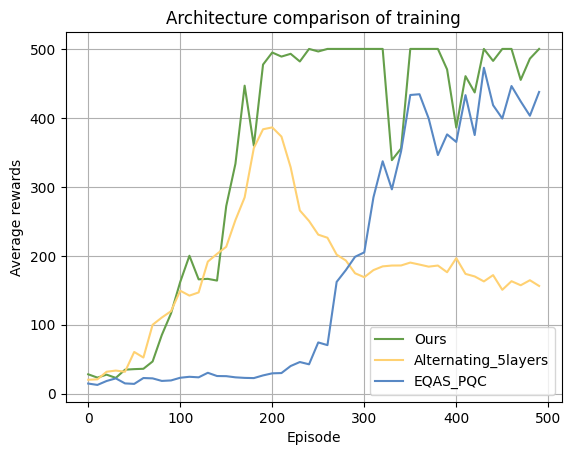

In [26]:
plt.plot(train_finished_episode_arch, train_average_rewards_id10, label='Ours', color=(0.831**5, 0.910**5, 0.780**5))
plt.plot(train_finished_episode_arch, train_average_rewards_layer5, label='Alternating_5layers', color=(1.0**5, 0.961**5, 0.851**5))
plt.plot(train_finished_episode_arch, train_average_rewards_eqas, label='EQAS_PQC', color=(0.808**5, 0.882**5, 0.949**5))
plt.title('Architecture comparison of training')
plt.xlabel('Episode')
plt.ylabel('Average rewards')
plt.legend()
plt.grid()

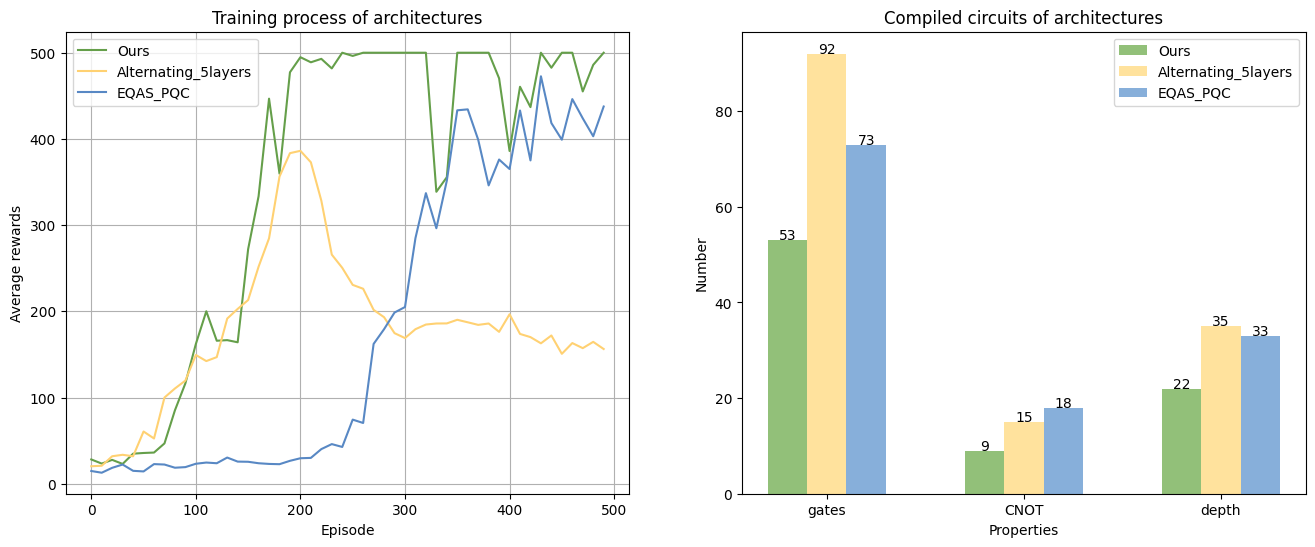

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(train_finished_episode_arch, train_average_rewards_id10, label='Ours', color=(0.831**5, 0.910**5, 0.780**5))
ax1.plot(train_finished_episode_arch, train_average_rewards_layer5, label='Alternating_5layers', color=(1.0**5, 0.961**5, 0.851**5))
ax1.plot(train_finished_episode_arch, train_average_rewards_eqas, label='EQAS_PQC', color=(0.808**5, 0.882**5, 0.949**5))
ax1.set_title('Training process of architectures')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Average rewards')
ax1.legend()
ax1.grid()

# 绘制三个对象的三个性质的柱状图
ax2.bar(x - width, Ours, width, label='Ours', color=(0.831**3, 0.910**3, 0.780**3))
ax2.bar(x, Alternating_5layers, width, label='Alternating_5layers', color=(1.0**3, 0.961**3, 0.851**3))
ax2.bar(x + width, EQAS_PQC, width, label='EQAS_PQC', color=(0.808**3, 0.882**3, 0.949**3))

# 标注每个柱子上的数值
for i, j in enumerate(Ours):
    ax2.text(i - width, j+0.1, str(j), ha='center')
for i, j in enumerate(Alternating_5layers):
    ax2.text(i, j+0.1, str(j), ha='center')
for i, j in enumerate(EQAS_PQC):
    ax2.text(i + width, j+0.1, str(j), ha='center')

# 设置图表标题和轴标签
ax2.set_title('Compiled circuits of architectures')
ax2.set_xlabel('Properties')
ax2.set_ylabel('Number')

# 设置x轴刻度标签
ax2.set_xticks(x, properties)

# 增加图例
ax2.legend()